In [342]:
import pandas as pd
import numpy as np
np.random.seed(42)

df = pd.read_csv('../NSE_data_all_stocks_2022_jan_to_may (1).csv')
df

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,EGAD,Eaagads Ltd,10,15,13.5,13.8,13.5,13.5,-,-,"4,000",-
1,3-Jan-22,KUKZ,Kakuzi Plc,355,427,385,385,385,385,-,-,-,-
2,3-Jan-22,KAPC,Kapchorua Tea Kenya Plc,80,101,99.5,99.5,99.5,95.5,4,4.19%,100,-
3,3-Jan-22,LIMT,Limuru Tea Plc,260,360,320,320,320,320,-,-,-,-
4,3-Jan-22,SASN,Sasini Plc,16.75,22.6,18.7,18.7,18.7,18.7,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,31-May-22,MSC,Mumias Sugar Company Ltd,0.27,0.27,0.27,0.27,0.27,0.27,-,-,-,-
6728,31-May-22,UNGA,Unga Group Ltd,26.1,36.4,29,29,29,30,-1,3.33%,"2,100",-
6729,31-May-22,SCOM,Safaricom Plc,25.5,45.25,25.95,26.45,26,26.25,-0.25,0.95%,"20,079,900",-
6730,31-May-22,FAHR,Stanlib Fahari Income-REIT,5,7.48,5.5,5.6,5.56,5.58,-0.02,0.36%,"11,700",-


In [343]:
#Custom Data cleaner 
import random
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler   
nsc_scaler = StandardScaler()   

class NSEDataPreProcessor(BaseEstimator, TransformerMixin):
    
    def __init__(self,company_code ,columns_to_type_cast, columns_to_scale, columns_to_return):
        self.company_code = company_code        
        self.to_type_cast= columns_to_type_cast 
        self.to_return= columns_to_return
        self.to_scale=columns_to_scale  #same as  columns_to_type_cast but has the company code.       
        
    def __type_cast_and_scale_xyz_df(self, xyz_data_frame):
        for column_name in self.to_type_cast:
            xyz_data_frame[column_name] = pd.to_numeric(xyz_data_frame[column_name], errors='coerce')
        # xyz_data_frame[self.to_scale] = nsc_scaler.fit_transform(xyz_data_frame[self.to_scale])       
        
        return xyz_data_frame[self.to_return]
    
    def fit(self, X, y=None):
        return self      

    def transform(self, X): 
        xyz_company_data_frame = X[X['Code'] == self.company_code].reset_index(drop=True)
        type_converted_xyz_company_df = self.__type_cast_and_scale_xyz_df(
            xyz_company_data_frame       
        )        
        return type_converted_xyz_company_df
    
random_company_code = random.choice(df.Code)

__nse_dat_preprocessor = NSEDataPreProcessor(
    company_code= random_company_code,
    columns_to_type_cast=['Day Price','Day High', 'Day Low', '12m High', '12m Low'],
    columns_to_scale=[],
    columns_to_return=['Date','Code','Day Price','Previous','Day High', 'Day Low', '12m High', '12m Low'], 
)

xyz_preprocessed_df = __nse_dat_preprocessor.fit_transform(
    df,    
)
display(xyz_preprocessed_df.head(1)) 

preprocessed_df = xyz_preprocessed_df.drop(columns=['Code'])
preprocessed_df
    

,Date,Code,Day Price,Previous,Day High,Day Low,12m High,12m Low
0,3-Jan-22,BAMB,38.2,38,38.45,38.0,42.0,33


,Date,Day Price,Previous,Day High,Day Low,12m High,12m Low
0,3-Jan-22,38.20,38,38.45,38.00,42.0,33
1,4-Jan-22,37.75,38.2,38.00,37.50,42.0,33
2,5-Jan-22,37.95,37.75,38.10,37.00,42.0,33
3,6-Jan-22,37.85,37.95,38.00,37.50,42.0,33
4,7-Jan-22,38.00,37.85,38.00,37.95,42.0,33
...,...,...,...,...,...,...,...
97,25-May-22,35.75,35.35,36.85,35.50,40.0,33
98,26-May-22,35.55,35.75,36.55,35.10,40.0,33
99,27-May-22,35.15,35.55,35.50,34.30,40.0,33
100,30-May-22,32.50,35.15,34.95,32.00,40.0,32


In [344]:
x_features = ['Previous','Day High', 'Day Low', '12m High', '12m Low']
y_classes = 'Day Price'

day_price_df = preprocessed_df[['Day Price', '12m Low', '12m High']]
day_price_df


,Day Price,12m Low,12m High
0,38.20,33,42.0
1,37.75,33,42.0
2,37.95,33,42.0
3,37.85,33,42.0
4,38.00,33,42.0
...,...,...,...
97,35.75,33,40.0
98,35.55,33,40.0
99,35.15,33,40.0
100,32.50,32,40.0


# Gradient boostinf starts here 

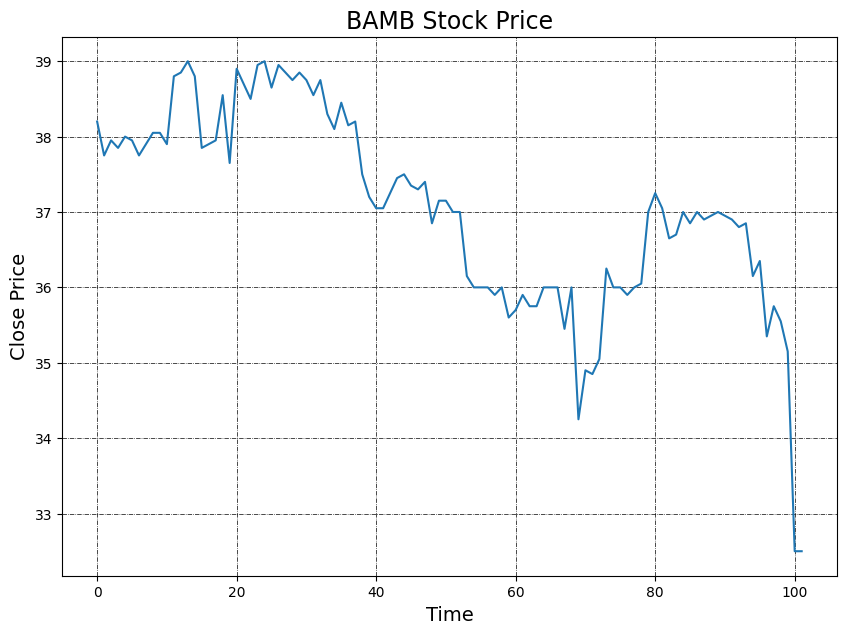

In [345]:
import matplotlib.pyplot as plt 

day_price_df['Day Price'].plot(figsize=(10, 7))
plt.title(random_company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [346]:
import pandas_ta as ta

day_price_df = day_price_df.copy()  #we need to create a copy  of a dataframe before modifying it .
day_price_df.loc[:, 'EMA'] = ta.ema(day_price_df['Day Price'], length=4)
day_price_df.loc[:, 'EMA_12M_LOW'] = ta.ema(day_price_df['12m Low'], length=4)
day_price_df.loc[:, 'EMA_12M_HIGH'] = ta.ema(day_price_df['12m High'], length=4)

day_price_df



,Day Price,12m Low,12m High,EMA,EMA_12M_LOW,EMA_12M_HIGH
0,38.20,33,42.0,NaN,NaN,NaN
1,37.75,33,42.0,NaN,NaN,NaN
2,37.95,33,42.0,NaN,NaN,NaN
3,37.85,33,42.0,37.937500,33.00,42.000000
4,38.00,33,42.0,37.962500,33.00,42.000000
...,...,...,...,...,...,...
97,35.75,33,40.0,35.919763,33.00,40.000994
98,35.55,33,40.0,35.771858,33.00,40.000597
99,35.15,33,40.0,35.523115,33.00,40.000358
100,32.50,32,40.0,34.313869,32.60,40.000215


# Generating the previous 12m High , Low and Day Price: using pd.shift()

In [347]:
day_price_df['previous_day_price_ema'] = day_price_df['EMA'].shift(1)
day_price_df['previous_12m_high_ema'] = day_price_df['EMA_12M_HIGH'].shift(1)
day_price_df['previous_12m_low_ema'] = day_price_df['EMA_12M_LOW'].shift(1)
day_price_df

,Day Price,12m Low,12m High,EMA,EMA_12M_LOW,EMA_12M_HIGH,previous_day_price_ema,previous_12m_high_ema,previous_12m_low_ema
0,38.20,33,42.0,NaN,NaN,NaN,NaN,NaN,NaN
1,37.75,33,42.0,NaN,NaN,NaN,NaN,NaN,NaN
2,37.95,33,42.0,NaN,NaN,NaN,NaN,NaN,NaN
3,37.85,33,42.0,37.937500,33.00,42.000000,NaN,NaN,NaN
4,38.00,33,42.0,37.962500,33.00,42.000000,37.937500,42.000000,33.0
...,...,...,...,...,...,...,...,...,...
97,35.75,33,40.0,35.919763,33.00,40.000994,36.032938,40.001657,33.0
98,35.55,33,40.0,35.771858,33.00,40.000597,35.919763,40.000994,33.0
99,35.15,33,40.0,35.523115,33.00,40.000358,35.771858,40.000597,33.0
100,32.50,32,40.0,34.313869,32.60,40.000215,35.523115,40.000358,33.0


In [348]:
day_price_df

,Day Price,12m Low,12m High,EMA,EMA_12M_LOW,EMA_12M_HIGH,previous_day_price_ema,previous_12m_high_ema,previous_12m_low_ema
0,38.20,33,42.0,NaN,NaN,NaN,NaN,NaN,NaN
1,37.75,33,42.0,NaN,NaN,NaN,NaN,NaN,NaN
2,37.95,33,42.0,NaN,NaN,NaN,NaN,NaN,NaN
3,37.85,33,42.0,37.937500,33.00,42.000000,NaN,NaN,NaN
4,38.00,33,42.0,37.962500,33.00,42.000000,37.937500,42.000000,33.0
...,...,...,...,...,...,...,...,...,...
97,35.75,33,40.0,35.919763,33.00,40.000994,36.032938,40.001657,33.0
98,35.55,33,40.0,35.771858,33.00,40.000597,35.919763,40.000994,33.0
99,35.15,33,40.0,35.523115,33.00,40.000358,35.771858,40.000597,33.0
100,32.50,32,40.0,34.313869,32.60,40.000215,35.523115,40.000358,33.0


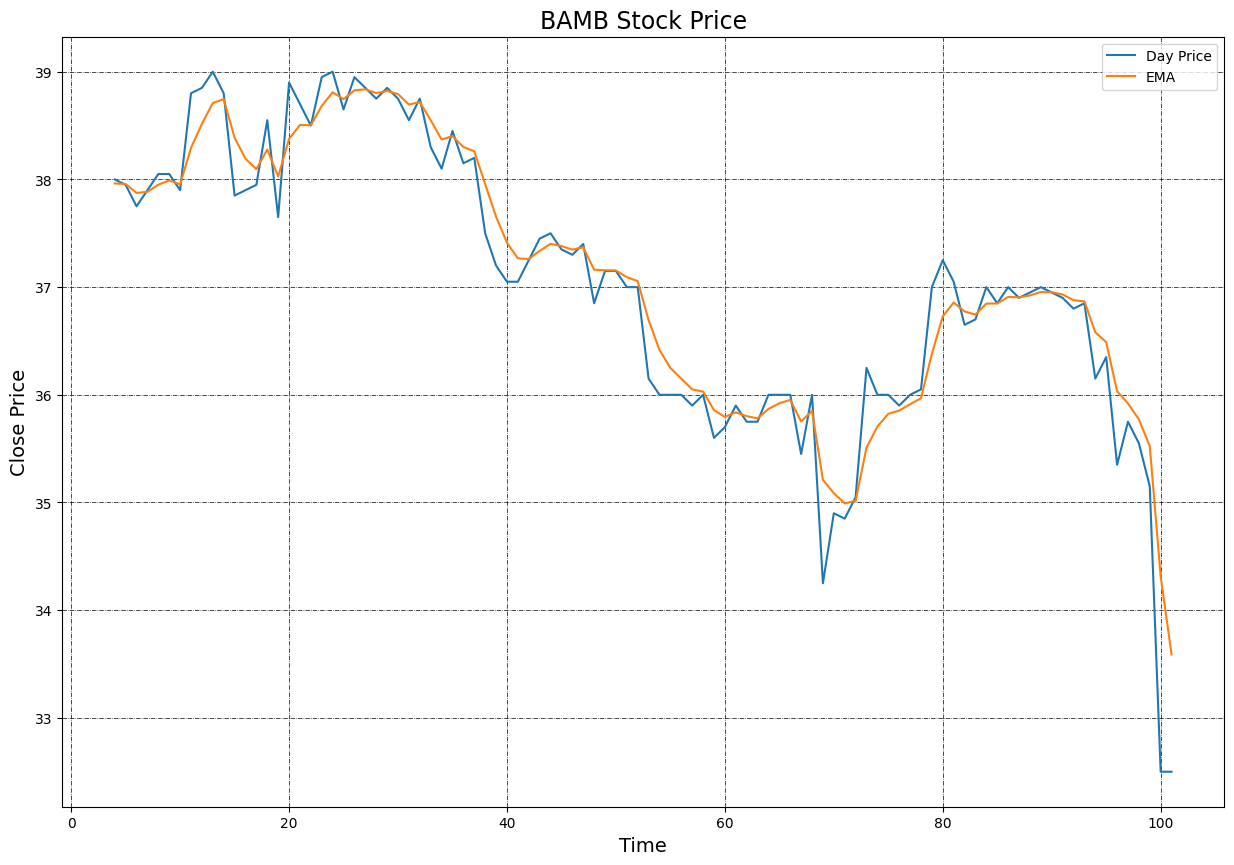

In [364]:
day_price_df.dropna(inplace=True)

day_price_df[['Day Price', 'EMA']].plot(figsize=(15, 10))
plt.title(random_company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [365]:
from sklearn.model_selection import train_test_split

features = day_price_df[['previous_day_price_ema','previous_12m_high_ema','previous_12m_low_ema']]
target = day_price_df[['Day Price']]

target

,Day Price
4,38.00
5,37.95
6,37.75
7,37.90
8,38.05
...,...
97,35.75
98,35.55
99,35.15
100,32.50


# Splitting Time Series Data : no shuffling

In [445]:

from sklearn.model_selection import TimeSeriesSplit

X=features.values
y=target['Day Price'].values

tscv = TimeSeriesSplit(n_splits=10)

generalized_test_indices = []
for i, (train_indices, test_indices) in enumerate(tscv.split(X)):
    
    random_test_index = np.random.choice(test_indices)
    generalized_test_indices.append(random_test_index)


generalized_train_indices = np.setdiff1d(np.arange(len(X)), generalized_test_indices)

X_train, X_test = X[generalized_train_indices], X[generalized_test_indices]
y_train, y_test = y[generalized_train_indices], y[generalized_test_indices] 
    
X_train.shape, y_test.shape

((88, 3), (10,))

# *********************** Grdient Boosting regressor model *************

In [446]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost

In [438]:

model = xgboost.XGBRegressor(objective='reg:squarederror')  # Specifies regression objective

cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Gradient Boosting Regressor Cross-Validation Scores:", end=' ')
print(cross_val_scores)

average_score = np.mean(cross_val_scores)
print(f"\nAverage Performance Metric: {average_score:.2f}")

Gradient Boosting Regressor Cross-Validation Scores: [-0.98349838 -0.483516   -0.29834295 -1.46364803 -1.72742057]

Average Performance Metric: -0.99


In [439]:
base_model = xgboost.XGBRegressor(objective='reg:squarederror', random_state=42)

hyper_parameter_grid ={
    'n_estimators': [100, 200, 300,500,1000],
    'learning_rate': [0.01,0.15, 0.1, 0.2],
    'booster':['gbtree','gblinear'],
    'max_depth': [3, 5,7,15],
    'min_child_weight': [1, 3,5,7,9,10],

}
grid_search =RandomizedSearchCV(
    estimator=base_model, 
    param_distributions= hyper_parameter_grid,
    cv=5,
    n_iter=100, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)
# grid_search =GridSearchCV(estimator=base_model, param_grid= hyper_parameter_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)


/home/kering/Desktop/MachineLearningProjects/KnowledgeBasedSystemsML/KnowledgeBasedSystemsVenv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:57:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/kering/Desktop/MachineLearningProjects/KnowledgeBasedSystemsML/KnowledgeBasedSystemsVenv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:57:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/kering/Desktop/MachineLearningProjects/KnowledgeBasedSystemsML/KnowledgeBasedSystemsVenv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:58:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/kering/Desktop/MachineLearningProjects/KnowledgeBasedSystemsML/Knowled

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.01, 0.15, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 15],
                                        'min_child_weight': [1, 3, 5, 7, 9, 10],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000]},
                   scoring='neg_mean_squared_error')

In [440]:
best_params = grid_search.best_params_
best_params


{'n_estimators': 300,
 'min_child_weight': 7,
 'max_depth': 3,
 'learning_rate': 0.01,
 'booster': 'gbtree'}

In [441]:
final_model = xgboost.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [442]:
import pandas as pd
predicted_stock_prices = final_model.predict(X_test)



results=pd.DataFrame({
    "Actual": y_test,
    "Predicted":predicted_stock_prices
})
results


,Actual,Predicted
0,38.95,38.565453
1,38.55,38.401592
2,37.05,37.232624
3,37.15,37.008694
4,36.00,36.006763
5,34.25,36.317001
6,34.85,35.434284
7,37.00,36.721767
8,36.80,36.981407
9,35.75,35.456703


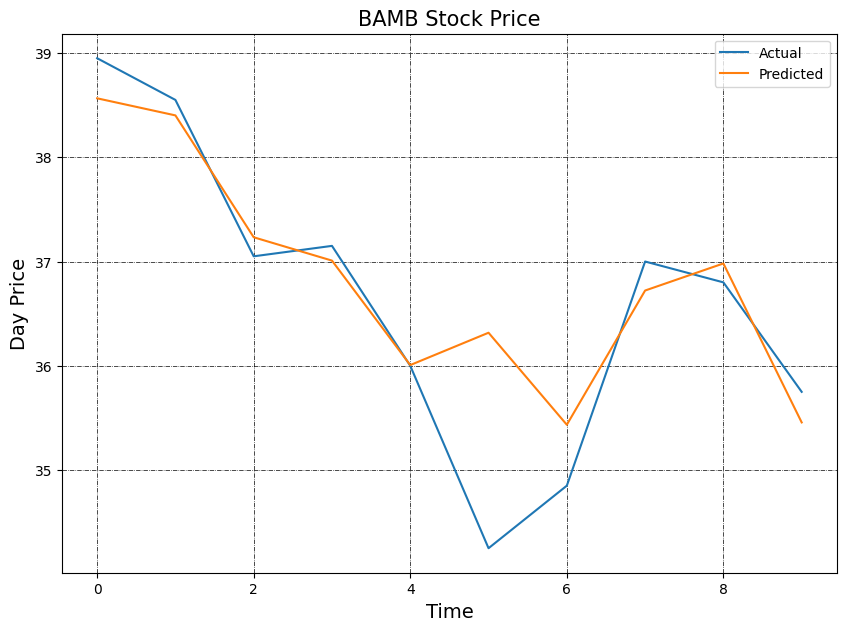

In [444]:
results[['Actual', 'Predicted']].plot(figsize=(10, 7))
plt.title(random_company_code + " Stock Price", fontsize=15)
plt.ylabel('Day Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()